## import library and Load Dataset

In [9]:
from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [11]:
training_data = MSCTD(mode='train',transformer=Compose([]),root_dir="C:\\Users\\bs04\\deepLearningProject\\",read_mode="scene")
valid_data = MSCTD(mode='validation',transformer=Compose([]),root_dir="C:\\Users\\bs04\\deepLearningProject\\",read_mode="scene")
test_data = MSCTD(mode='test',transformer=Compose([]),root_dir="C:\\Users\\bs04\\deepLearningProject\\",read_mode="scene")

Downloading...
From: https://drive.google.com/uc?id=1-ecQKcBm_tfFVu4iK_1RIT1xy3QPowT1
To: C:\Users\bs04\deepLearningProject\Datasets\validation.zip
100%|██████████| 638M/638M [05:36<00:00, 1.90MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-QF5cs9VBHjxzd-L0U9OxRWV7vgm2iN5
To: C:\Users\bs04\deepLearningProject\Datasets\test.zip
100%|██████████| 641M/641M [05:39<00:00, 1.89MB/s] 


## A:

In [38]:
def sentimentDist(data, color):
    sentiment = []
    sentiment.extend(data.sentiment)
    sb.histplot(sentiment, color=color)

(0.0, 9000.0)

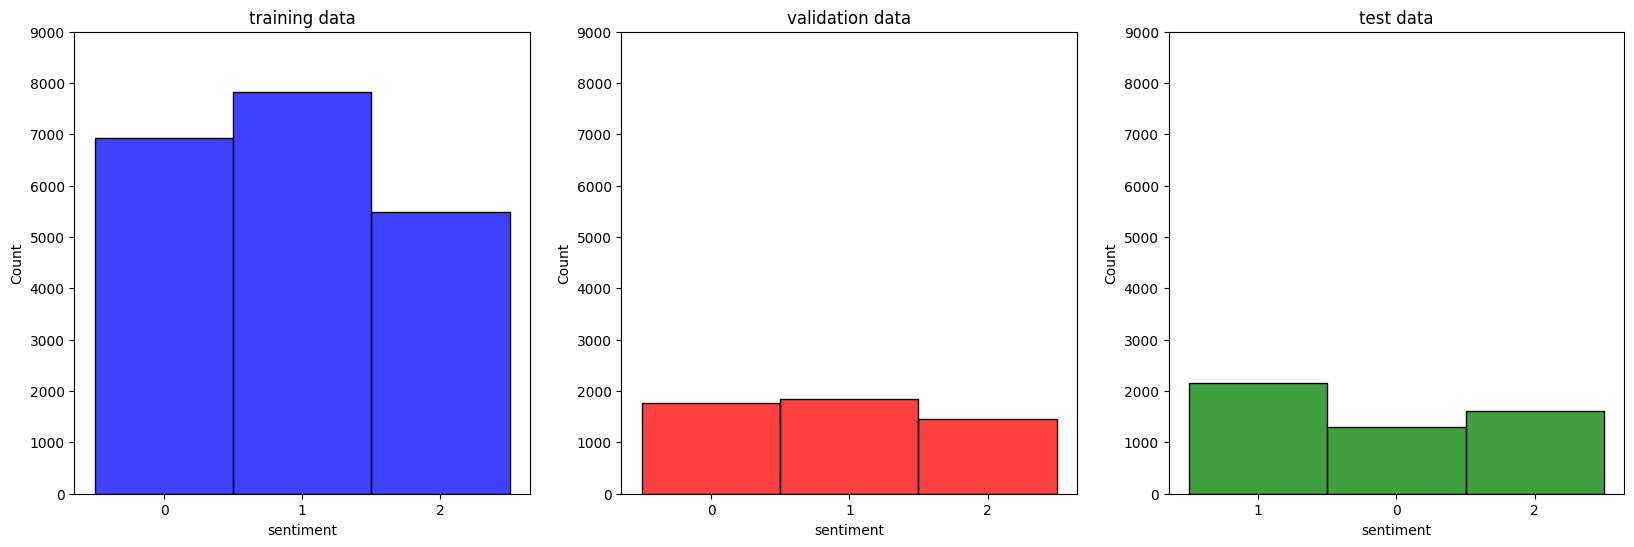

In [39]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sentimentDist(training_data, color='blue')
plt.title("training data")
plt.xlabel('sentiment')
plt.ylim((0,9000))

plt.subplot(1,3,2)
sentimentDist(valid_data, 'red')
plt.title("validation data")
plt.xlabel('sentiment')
plt.ylim((0,9000))

plt.subplot(1,3,3)
sentimentDist(test_data, 'green')
plt.title("test data")
plt.xlabel('sentiment')
plt.ylim((0,9000))

distribution of each class is almost same and this is ok for the training.

## B:

In [40]:
def wordsLength(data):
    length = np.array([len(sentence.split(" ")) for sentence in data.english_text])
    print("mean : ", length.mean())
    print("variance : ", length.var())
    sb.histplot(length, kde=True)
    plt.xlabel('Words Length')

* training data

mean :  6.4644268774703555
variance :  9.247252339514754


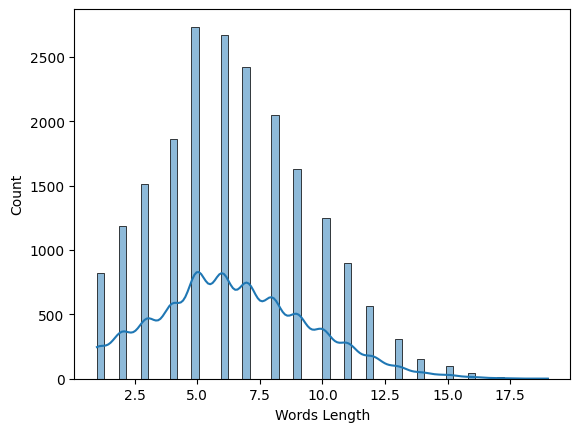

In [41]:
plt.title("training data Words Length histogram")
wordsLength(training_data)

* validation data

mean :  6.310290341694648
variance :  8.630759208611043


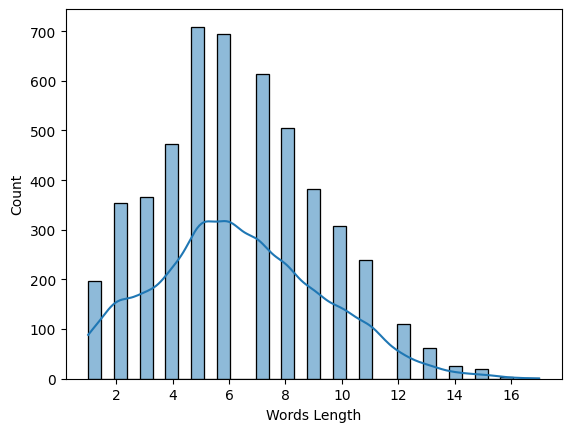

In [42]:
plt.title("validation data Words Length histogram")
wordsLength(valid_data)

* test data

mean :  6.303927373199132
variance :  8.892826494034605


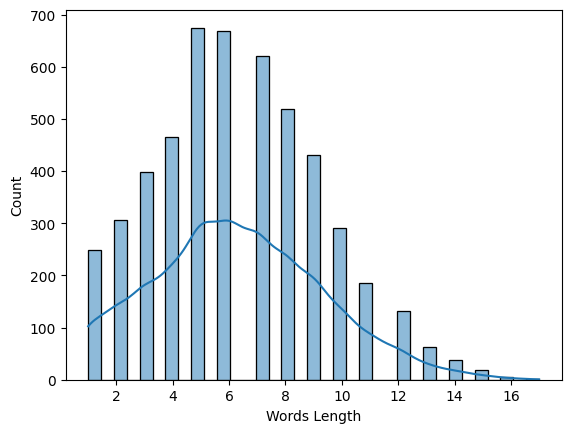

In [43]:
plt.title("test data Words Length histogram")
wordsLength(test_data)

distribution, mean, and variance of the Words Lenght histogram are approximately the same on the train, validation, and test Dataset


## C:

In [44]:
def imageConversation(data):
    numberFrame = np.array([len(index) for index in data.image_index])
    print("mean : ", numberFrame.mean())
    print("variance : ", numberFrame.var())
    sb.histplot(numberFrame, kde=True)
    plt.xlabel('number of image in conversation')

* training data

mean :  9.796708615682478
variance :  17.69632992187156


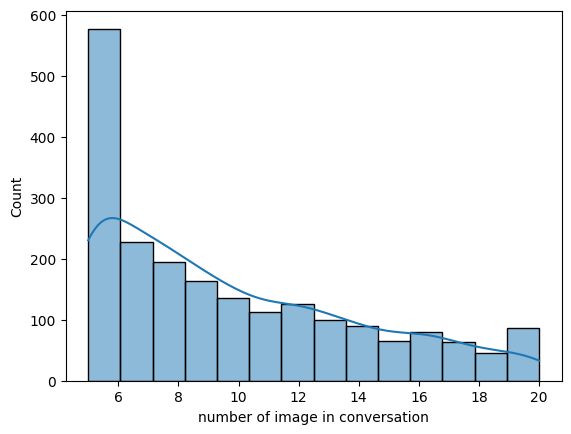

In [45]:
plt.title("Histogram of the number of frames per conversation for training data")
imageConversation(training_data)

* validation data 

mean :  10.045634920634921
variance :  19.253869834971024


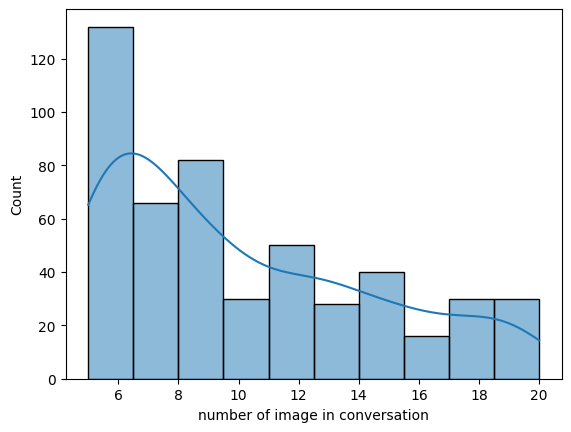

In [46]:
plt.title("Histogram of the number of frames per conversation for validation data")
imageConversation(valid_data)

* test data

In [1]:
plt.title("Histogram of the number of frames per conversation for test data")
imageConversation(test_data)

In an average way, most of the conversations have 10 frames and this is fixed for train, test, validation Datasets

## D:

### Train Face Count

In [ ]:
import dlib
data_size = 20240
face_count_dict = {}
for i in range(data_size):
    img = np.squeeze(data[i][0])
    img = np.array(img, dtype='uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)
    face_count = 0
    for face in faces:
        face_count = face_count+1
    face_count_dict[i+1] = face_count
face_count_dict

In [ ]:
import pickle 

with open('face_count_dict.pkl', 'wb') as f:
    pickle.dump(face_count_dict, f)

In [ ]:
import matplotlib.pyplot as plt
plt.bar(face_count_dict.keys(), face_count_dict.values())
plt.title('Number of Faces in each Image')
plt.xlabel('Images')
plt.ylabel('FaceCount')
plt.show()

In [ ]:
face_count_mean = np.mean(list(face_count_dict.values()))
face_count_var = np.var(list(face_count_dict.values()))
face_count_std = np.std(list(face_count_dict.values()))
print(f"mean: {face_count_mean}")
print(f"variance: {face_count_var}")
print(f"Standard Deviation: {face_count_std}")

In [ ]:
facelist = [] 
x = set(face_count_dict.values())
for i in x:
    facelist.append(sum(1 for v in face_count_dict.values() if v == i))
facelist    

In [ ]:
plt.bar(list(x), facelist)
plt.title('Number of Image vs Face Count')
plt.ylabel('Number of Images')
plt.xlabel('Face Count')
plt.show()

### Validation Face Count

In [ ]:
dev_data=MSCTD(mode='dev',root_dir="/content",transformer=Compose([]),read_mode="single")

In [ ]:
dev_data_size = 5062
dev_face_count_dict = {}
for i in range(dev_data_size):
    img = np.squeeze(dev_data[i][0])
    img = np.array(img, dtype='uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)
    face_count = 0
    for face in faces:
        face_count = face_count+1
    dev_face_count_dict[i+1] = face_count
dev_face_count_dict

In [ ]:
with open('dev_face_count_dict.pkl', 'wb') as f:
    pickle.dump(dev_face_count_dict, f)

In [ ]:
plt.bar(dev_face_count_dict.keys(), dev_face_count_dict.values())
plt.title('Number of Faces in each Image(Dev)')
plt.xlabel('Images')
plt.ylabel('FaceCount')
plt.show()

In [ ]:
dev_face_count_mean = np.mean(list(dev_face_count_dict.values()))
dev_face_count_var = np.var(list(dev_face_count_dict.values()))
dev_face_count_std = np.std(list(dev_face_count_dict.values()))
print(f"mean: {dev_face_count_mean}")
print(f"variance: {dev_face_count_var}")
print(f"Standard Deviation: {dev_face_count_std}")

In [ ]:
devfacelist = [] 
x = set(dev_face_count_dict.values())
for i in x:
    devfacelist.append(sum(1 for v in dev_face_count_dict.values() if v == i))
devfacelist    

In [ ]:
plt.bar(list(x), devfacelist)
plt.title('Number of Image vs Face Count(Dev)')
plt.ylabel('Number of Images')
plt.xlabel('Face Count')
plt.show()

### Test Face Count

In [ ]:
test_data=MSCTD(mode='test',root_dir="/content",transformer=Compose([]),read_mode="single")

In [ ]:
test_data_size = 5066
test_face_count_dict = {}
for i in range(test_data_size):
    img = np.squeeze(test_data[i][0])
    img = np.array(img, dtype='uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)
    face_count = 0
    for face in faces:
        face_count = face_count+1
    test_face_count_dict[i+1] = face_count
test_face_count_dict

In [ ]:
with open('test_face_count_dict.pkl', 'wb') as f:
    pickle.dump(test_face_count_dict, f)

In [ ]:
plt.bar(test_face_count_dict.keys(), test_face_count_dict.values())
plt.title('Number of Faces in each Image(Test)')
plt.xlabel('Images')
plt.ylabel('FaceCount')
plt.show()

In [ ]:
test_face_count_mean = np.mean(list(test_face_count_dict.values()))
test_face_count_var = np.var(list(test_face_count_dict.values()))
test_face_count_std = np.std(list(test_face_count_dict.values()))
print(f"mean: {test_face_count_mean}")
print(f"variance: {test_face_count_var}")
print(f"Standard Deviation: {test_face_count_std}")

In [ ]:
testfacelist = [] 
x = set(test_face_count_dict.values())
for i in x:
    testfacelist.append(sum(1 for v in test_face_count_dict.values() if v == i))
testfacelist    

In [ ]:
plt.bar(list(x), testfacelist)
plt.title('Number of Image vs Face Count(Test)')
plt.ylabel('Number of Images')
plt.xlabel('Face Count')
plt.show()

## E:

In [48]:
nSentiment = np.array([[int(j),len(i.split())] for i,j in zip(training_data.english_text, training_data.sentiment)])

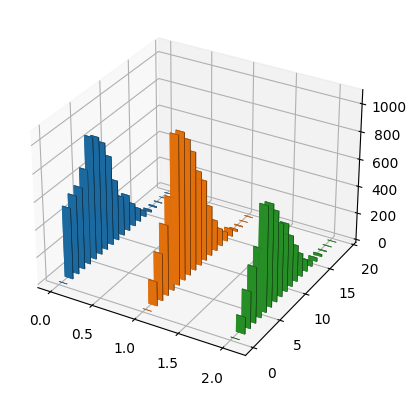

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xedges = range(2+2)
yedges = range(nSentiment[:,1].max()+2)
hist, xedges, yedges = np.histogram2d(nSentiment[:,0], nSentiment[:,1],bins=(xedges,yedges))

# Construct arrays for the anchor positions
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions
dx = dy = 0.1 * np.ones_like(zpos)
dz = hist.ravel()
idx = yedges[:-1].shape[0]
for i in range(3):
    ax.bar3d(xpos[idx*i:idx*(i+1)], ypos[idx*i:idx*(i+1)], zpos, dx, dy, dz[idx*i:idx*(i+1)], zsort='average')
ax.set_xlabel('sentiment')
ax.set_ylabel('number of words')
ax.set_zlabel('counts')
ax.set_title('histogram of words length for each sentiment')
plt.show()

We can understand from the above figure that the length of sentences has no effect on sentiment because all three sentiment distributions over the length of sentences are almost the same in other words correlation between sentiment and length of words is low.


## F:

In [50]:
def timeSentimentPattern(data):
    x = []
    for i in data.image_index:
        y = []
        for j in data.sentiment[i[0]:i[-1]+1]:
            if len(y) > 0 and j != y[-1]:
                y.extend(j)
            elif len(y) == 0:
                y.extend(j)
        x.append(''.join(y))
    return sorted(x,key=len)

* training data

Text(0.5, 0, 'Sentiment patterns over time')

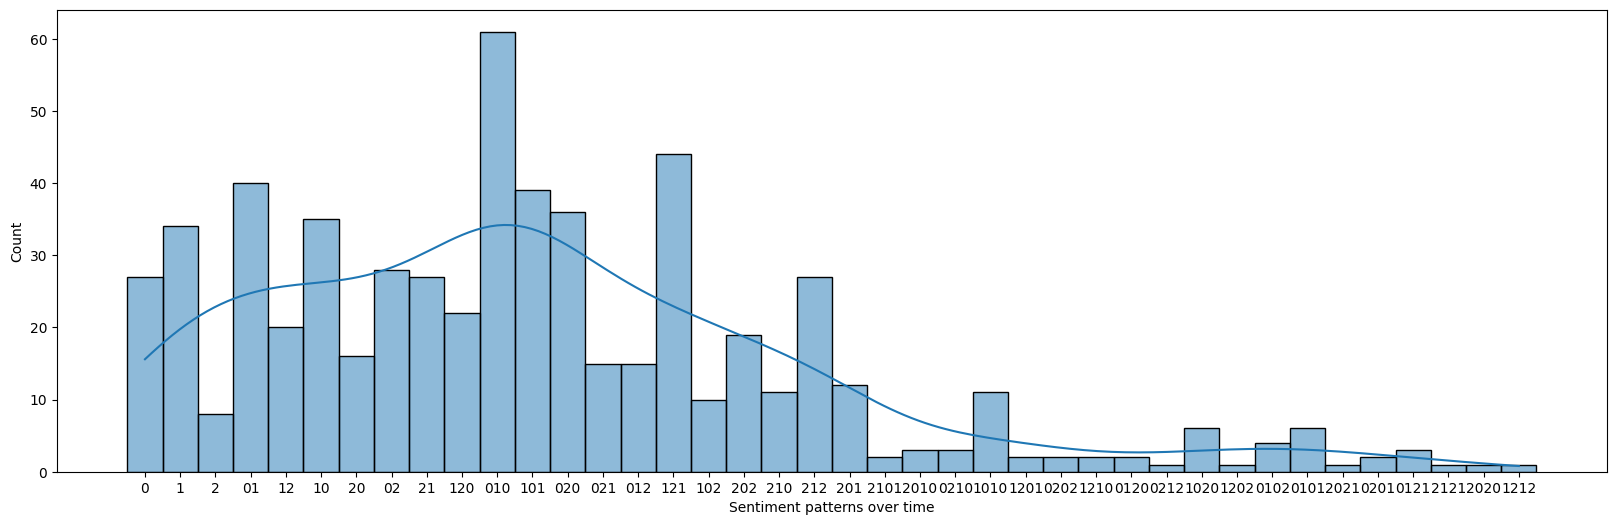

In [51]:
plt.figure(figsize=(20,6))
ax = sb.histplot(timeSentimentPattern(training_data)[0:600], kde=True);
plt.xlabel("Sentiment patterns over time")

* validation data 

Text(0.5, 0, 'Sentiment patterns over time')

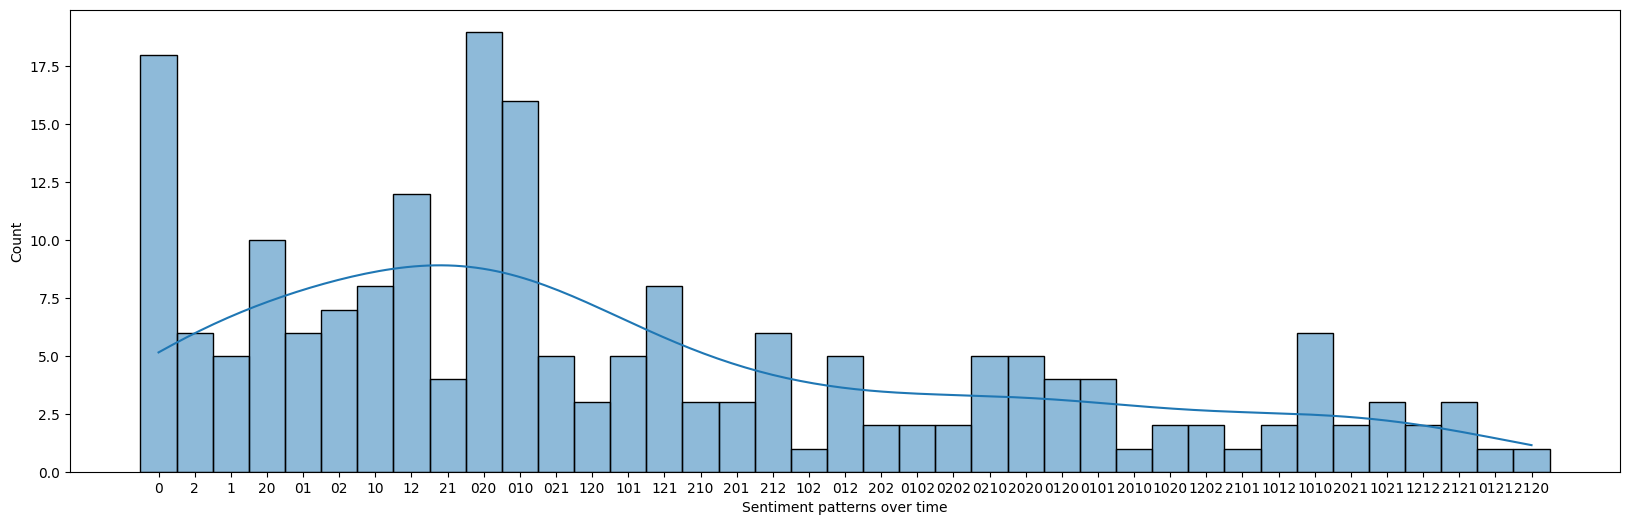

In [52]:
plt.figure(figsize=(20,6))
sb.histplot(timeSentimentPattern(valid_data)[0:200], kde=True);
plt.xlabel("Sentiment patterns over time")

* test data

Text(0.5, 0, 'Sentiment patterns over time')

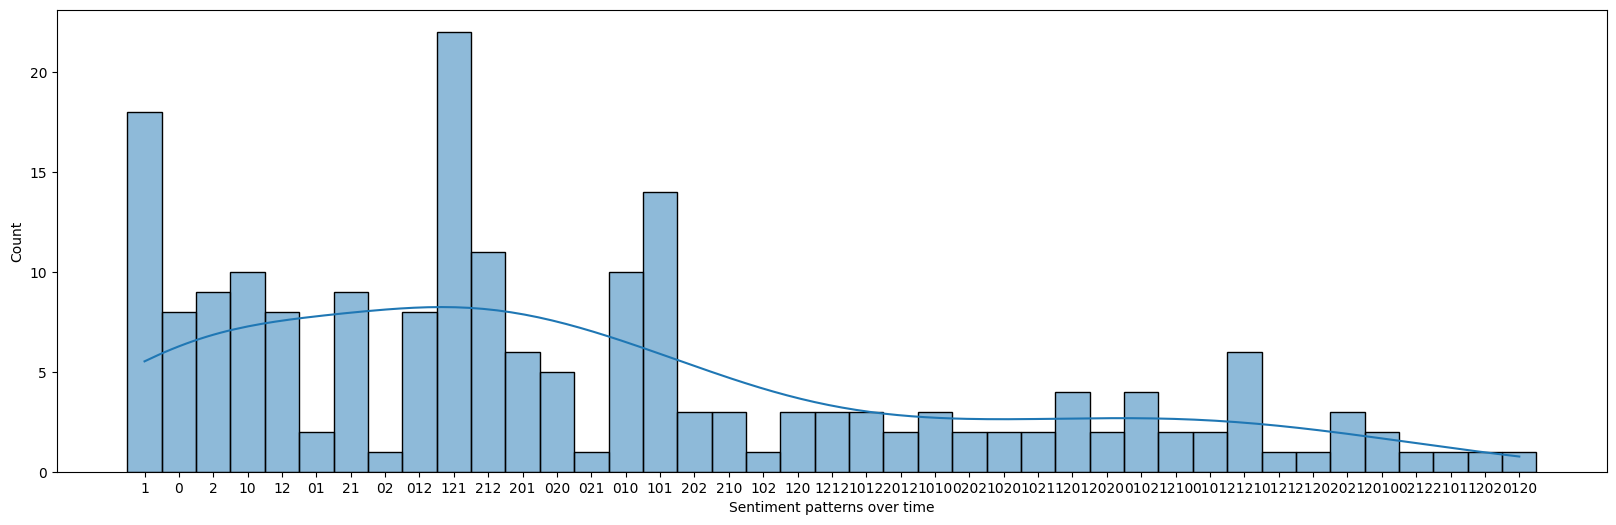

In [53]:
plt.figure(figsize=(20,6))
sb.histplot(timeSentimentPattern(test_data)[0:200], kde=True);
plt.xlabel("Sentiment patterns over time")

obviously, short patterns are more frequent than long patterns, and the histogram of sentiment patterns over time for training, test, and validation Datasets is different from each other

## G:

In [54]:
#TODO
def comparison(data):
    from math import floor
    lengthConv = [len(index) for index in data.image_index]
    print("number of class in pattern histogram :", len(set(timeSentimentPattern(data))))
    print("number of possible pattern :", 3*(2**(floor(np.mean(lengthConv))+1)-1))

in theory, the number of possibilities in a fixed number of n frames is 3 * 2 ** (n-1) because the first stage has 3 selections of sentiments but others have two selections.
also if there is a redundancy in Successive sentiment, the length of the sentiment pattern is reduced by one, and one of factors two in the formula is reduced too, this pattern is continued to reduce just one sentiment by 3 selections.

* training data

In [55]:
comparison(training_data)

number of class in pattern histogram : 681
number of possible pattern : 3069


* validation data

In [56]:
comparison(valid_data)

number of class in pattern histogram : 250
number of possible pattern : 6141


* test data

In [57]:
comparison(test_data)

number of class in pattern histogram : 255
number of possible pattern : 3069


it s can be known all of the possibilities in the data didn't occur and this due to the difference between theory and practical